# Recurrent Neural Network Guide: a Deep Dive in RNN

Sequence modeling is a task of modeling sequential data. Modeling sequence data is when you create a mathematical notion to understand and study sequential data, and use those understandings to generate, predict or classify the same for a specific application. 

Sequential data has three properties:

1. Elements in the sequence can repeat
2. It follows order (contextual arrangement)
3. Length of data varies (potentially infinitely)

Example of sequential data are: 

1. Text and sentences
2. Audio (eg. speech and music)
3. Motion pictures or videos
4. Time-series data (eg. Stock market data)
5. DNA sequence, protein structures
6. Material composition 
7. Decision-making

Sequence data is difficult to model because of its properties, and it requires a different method. For instance, if sequential data is fed through a feed-forward network, it might not be able to model it well, because **sequential data has variable length.** The feed-forward network works well with fixed-size input, and doesn’t take structure into account well. 

Convolutional neural networks, on the other hand, were created to process structures, or grids of data, such as an image. They can deal with long sequences of data, but are limited by the fact that **they can’t order the sequence correctly.** 

So, **how do we build deep learning models that can model sequential data?** 

When we process sequential data, we try to model the input sequence. Unlike a supervised learning task, where we map the input with the output, in sequence modeling we try to model how **probable** the sequence is.  

- Data: $\{x_i\}_i$
- Model: $p(x) = f_\theta(x)$
- Loss: $L(\theta) = \sum_{i=1}^N \log p(f_\theta(x_i))$
- Optimization: $\theta^* = \arg \max_\theta L(\theta)$


This gives machine learning or deep learning models the ability to generate likeable sequences, or an ability to estimate the likeliness of the sequence. The rest of the process of calculating the loss function and optimisation remains the same. 

## How to model sequences: Modeling p(x)

Assuming that words in a sentence are independent to each other, we can use a corpus which tells us how probable each of the words in the English language is. 

Once we know the probability of each word (from the corpus), we can then find the probability of the entire sentence by multiplying individual words with each other. 

For instance, if we were to model the sentence “Cryptocurrency is the next big thing”, then it would look something like this:

p(“Cryptocurrency”)p(“is”)p(“the”)p(“next”)p(“big”)p(“thing”)

The above model can be described in a formula:

$$
p(x) = \Pi_{t=1}^T p(x_t)
$$

Each word is given a timestamp: t,  t-1,  t-2,  t-n, which describes the position of an individual word. 

But, it turns out that the model described above does not really capture the structure of the sequence. Why?

Because the probability of any particular word can be higher than the rest of the word. In our example, the probability of the word “the” is higher than any other word, so the resultant sequence will be “The the the the the the”.  

## Modeling p(x|context)

Although we could still modify the same model by introducing conditional probability, assuming that each word is now dependent on every other word rather than independent, we could now model the sequence in the following way: $p(x_T) = p(x_T | x_1…., x_{T-1})$. 

The same sentence “Cryptocurrency is the next big ______” can now have a range of options to choose from. For example:

| Target| $p(x \| context)$|
|--------|------------|
| Stuff     | 0.0002    |
| Thing     | 0.01     |
| Coin      | 0.00003    |


**Essentially, conditional probability describes what the next word will be.** 

But the above example can predict one word at a time; in order to predict a sequence of words we need to calculate the joint probability from the conditionals. 

$$
p(x) = \Pi_{t=1}^T p(x_t|x_1,...,x_{t-1})
$$

For instance

| Target| $p(x \| context)$|
|--------|---------------|
| Cryptocurrency     | $p(x_1)$     |
| Cryptocurrency **is**     | $p(x_2\|x_1)$      |
| Cryptocurrency is **the**      | $p(x_3\|x_2,x_1)$    |
| Cryptocurrency is the **next**     | $p(x_4\|x_3,x_2,x_1)$    |
| Cryptocurrency is the next **big**     |  $p(x_5\|x_4,x_3,x_2,x_1)$     |
| Cryptocurrency is the next big **thing**      | $p(x_6\|x_5,x_4,x_3,x_2,x_1)$ |

Note: The predicted words are written in bold

So far we understood how to go about modeling a sequence of sentences using a corpus of words (which contains probability value), and then calculating **joint** and **conditional** probability of each word in the sentence we could select the appropriate word from the corpus and predict the next word in a sentence.  

This type of approach works well with a few sentences, and **captures the structure of the data very well**. But when we deal with paragraphs, then we have to deal with **scalability**. When such models are introduced with large sentences, then processing power increases and efficiency decreases. 

# N-grams

To counter the issue of scalability, NLP (natural language processing) researchers introduced the idea of **N-grams**, where you take into account an ‘n’ number of words for conditional and joint probability. For instance, if n is equal 2, then only the previous two words of the sentence will be used to calculate joint probability instead of the entire sentence. 

| Target| $p(x \| context)$ and $n=2$|
|--------|---------------|
| Cryptocurrency     | $p(x_1)$     |
| Cryptocurrency **is**     | $p(x_2\|x_1)$      |
| Cryptocurrency is **the**      | $p(x_3\|x_2,x_1)$    |
| Cryptocurrency is the **next**     | $p(x_4\|x_3,x_2)$    |
| Cryptocurrency is the next **big**     |  $p(x_5\|x_4,x_3)$     |
| Cryptocurrency is the next big **thing**      | $p(x_6\|x_5,x_4)$ |

Note: the predicted words are written in bold

This approach reduces the scalability issue, but not completely. 

The disadvantages of N-grams are:

1. Context of the sentence is lost if the sentence is long.
2. Reduces the scalability issue by a small scale

## Context vectorizing

Context vectorizing is an approach where the input sequence is summarized to a vector such that the vector is then used to predict what the next word could be. 

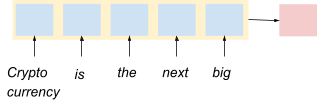

$f_\theta$ summarizes the context in h such that:

$p(x_t\|x_1,...,x_{t-1}) \approx p(x_t\|h)$

Once we find the context vector **h**, we can then use a **second function** g which produces a **probability distribution**. 

The advantages of context vectorizing are:

1. Order is preserved
2. Can operate in variable length of sequences
3. It can learn hence differentiable (backpropagation)
4. Context is preserved in short sentences or sequences. 

So far we have seen what sequential data is and how to model it. In the next section, we will learn about RNNs and how they use context vectorizing to predict the next word. 

## What are recurrent neural networks (RNNs)?

Recurrent neural networks are used to model sequential data with the time step index t, and incorporate the technique of context vectorizing. 

Context vectoring acts as “memory” which captures information about what has been calculated so far, and enables RNNs to remember past information, where they’re able to preserve information of long and variable sequences. Because of that, RNNs can take one or multiple input vectors and produce one or multiple output vectors. 

RNNs by design are similar to deep neural networks. They have input vectors, weight vectors, hidden states and output vectors. The hidden state captures the patterns or the context of a sequence into a summary vector. The outputs are influenced not just by weights applied on inputs like a regular neural network, but also by a “hidden” state vector representing the context based information on prior inputs, such that the same input could produce a different output depending on context of inputs in the sequence.

## How does RNN work?

As discussed RNNs have four major components:

1. Input
2. Hidden state
3. Weights or parameters
4. Output

To understand RNN better we need to see how the multi-layer perceptron works with sequential data.

## Multi-layer perceptron

In the multi-layer perceptron (MLP), we have an input layer, a hidden layer and an output layer. The input layer receives the input, passes it through the hidden layer where activations are applied, and then returns the output.

When multiple hidden layers are present, the activations are applied to each node of a first hidden layer, and then sent to the next hidden layer, and so forth until it reaches the last layer to produce the output. Each hidden layer is characterized by its own weights and biases, making them independent of each other. 

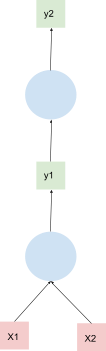

But the relationship can’t be established between the two unless we combine these hidden layers together because we’re dealing with sequences. **If the hidden layers are independent of each other, then the structure and the order will be lost**. So, in order to combine these hidden layers together, we should have the same weights and bias for each of these hidden layers.

To achieve this continuous and structured relationship between the input and output, we need to feed the input sentence word by word into all the hidden layers in a sequence, simultaneously feeding the output of the previous neuron to the next. 

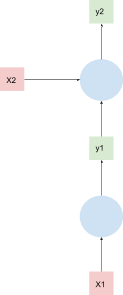

This approach makes the overall process structured and contextual. 

This is the inception of recurrent neural networks, where previous input combines with the current input, thereby preserving some relationship of the current input $(x_2)$ with the previous input $(x_1)$.

In essence, RNNs are a modified version of MLP, where the data is fed in each hidden layer.

## Recurrent neural network

In RNNs, $x(t)$​ is taken as the input to the network at time step t. The time step t in RNN indicates the order in which a word occurs in a sentence or sequence. The hidden state $h(t)$​ represents a contextual vector at time t and acts as “memory” of the network. Contextual vector $h(t)$​ is calculated based on the current input and the previous time step’s hidden state. 

For instance, take the sentence “Cryptocurrency is the next big thing”. At time $t_1$ “Cryptocurrency” will be fed into the network, at time $t_2$ “is” be fed into the network, at time $t_3$ “the” be fed into the network, and so forth. 

We denote a hidden state using this formula:

$$
h_t= \tanh(W_h h_{t-1} + W_x x_t)
$$

When $t = 1$,

$h_1= \tanh(W_hh_0+ W_xx_1)$, where $x_1$ is ‘Cryptocurrency’, and $h_0$ is initialised as zero

When $t = 2$,

$h_2= \tanh(W_hh_1 + W_xx_2)$, where $x_1$ is ‘is’. 

When $t = 3$,

$h_3= \tanh(W_hh_2 + W_xx_3)$, where $x_2$ is ‘the’. 

The weight parameters for both hidden state and input are learnable, which means that during the training it will update itself using backpropagation. 

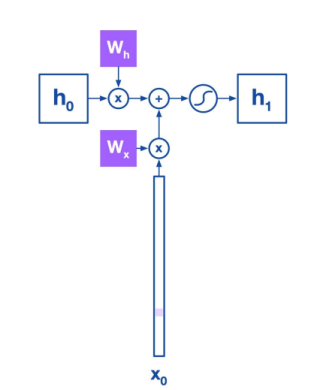

If you notice the formula above you will observe that the parameters $=\{W_h,W_x,W_y\}$ remain constant in each and every input. This is known as **parameter sharing**. Parameter sharing gives RNNs the ability to structure and retain contextual information even if the length of the sentence has variable length. Such sharing is important when we want to model a sequence where a data can reoccur quite often. **RNNs share the same weight across several time steps**.

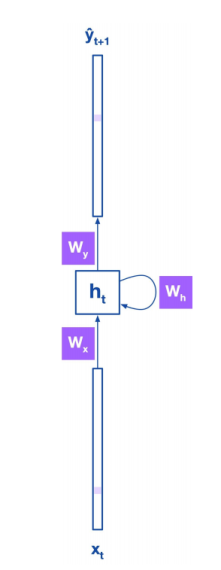

The RNNs predict the output from the last hidden state along with output parameter Wy. Prediction is more of a classification task, where a **softmax** function is used to ensure the probability over all the possible words in the english sentence. 

## Training RNNs

### Computing gradients: Backpropagation through time

So far we’ve seen how feed-forward works in RNNs, i.e. the inputs enter the network and move forward while sharing the same parameter across each time step. During backpropagation it has to go back through the time-step to update the parameters. 

So how does it happen?

As discussed earlier, predicting output in RNN is a classification task, so we use cross-entropy to calculate the loss. 

$$
L_θ(y,y’)_t = -y_t\log y_{t‘}
$$

Where $θ=\{W_h,W_x,W_y\}$

We know that the parameters are shareable, and it’s this ability of RNNs that makes all the difference in the network; it’s quite tricky to differentiate. In order to tackle this problem, the network needs to be expanded, or **unfolded**, so that the parameters could be differentiated across the network with respect to time step – hence the term backpropagation through time (BPTT). 

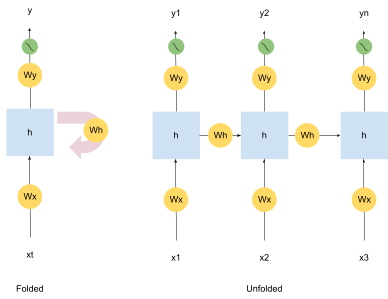

From the above diagram you can see how an unfolded recurrent network looks like. 

Since the neural network takes one word at a time, the loss calculated is based on per-word basis. The overall procedure looks like this:

$$
\begin{align}
\frac{\partial h_t}{\partial W_h} & = \frac{\partial h_t}{\partial W_h} + \frac{\partial h_t}{\partial h_{t-1}}\frac{\partial h_{t-1}}{\partial W_h} \\

& = \frac{\partial h_t}{\partial W_h} + \frac{\partial h_t}{\partial h_{t-1}}\left[ \frac{\partial h_{t-1}}{\partial W_h} + \frac{\partial h_{t-1}}{\partial h_{t-2}}\frac{\partial h_{t-2}}{\partial W_h}\right]\\

& \dots \\

& = \sum_{k=1}^t\frac{\partial h_t}{\partial h_{k}}\frac{\partial h_{k}}{\partial W_h}
\end{align}
$$

You can see how the expansion in formula takes place. 

For differentiation with respect to Wy, the procedure should look like this:

